#  1. DataProcessing & Explore

In [1]:
import pandas as pd
flights_data=pd.read_csv("flight_weather.csv")

C:\Users\armer\AppData\Local\Temp\ipykernel_20880\1997709344.py:2: DtypeWarning: Columns (36,38,39,54,56,57,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_data=pd.read_csv("flight_weather.csv")


### Airports cancellation rates

In [2]:
flights_data.head()

,DayOfWeek,FlightDate,Marketing_Airline_Network,Origin,Dest,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,...,HourlyWindDirection_ORIGIN,HourlyWindSpeed_ORIGIN,REPORT_TYPE_ORIGIN,AIRPORT_CODE_ORIGIN,TIME_ORIGIN,HOUR_ORIGIN,DailySnowDepth_ORIGIN,DailySnowfall_ORIGIN,DailySnowDepth_DEST,DailySnowfall_DEST
0,4,2018-11-15,DL,BDL,RDU,600,600.0,0.0,750,800.0,...,10.0,2.6,FM-15,BDL,651,600,0.0,193.0,0.0,0.0
1,4,2018-11-15,AA,BDL,MIA,618,615.0,-3.0,939,929.0,...,10.0,2.6,FM-15,BDL,651,600,0.0,193.0,0,0
2,4,2018-11-15,AA,BDL,CLT,609,602.0,-7.0,826,824.0,...,10.0,2.6,FM-15,BDL,651,600,0.0,193.0,0.0,0.0
3,4,2018-11-15,DL,BDL,ATL,600,559.0,-1.0,841,832.0,...,10.0,2.6,FM-15,BDL,651,600,0.0,193.0,0.0,0.0
4,4,2018-11-15,UA,BDL,ORD,630,626.0,-4.0,808,814.0,...,10.0,2.6,FM-15,BDL,651,600,0.0,193.0,0.0,28.0


In [51]:
airport_cancelled_rate = flights_data.groupby('Origin')['Cancelled'].mean()

In [54]:
airport_cancelled_rate.sort_values()

Origin
SJU    0.005430
SLC    0.008291
KOA    0.009786
ATL    0.010041
HNL    0.011333
         ...   
ALB    0.031262
PWM    0.031335
GRR    0.033625
MDW    0.043387
BUF    0.046688
Name: Cancelled, Length: 101, dtype: float64

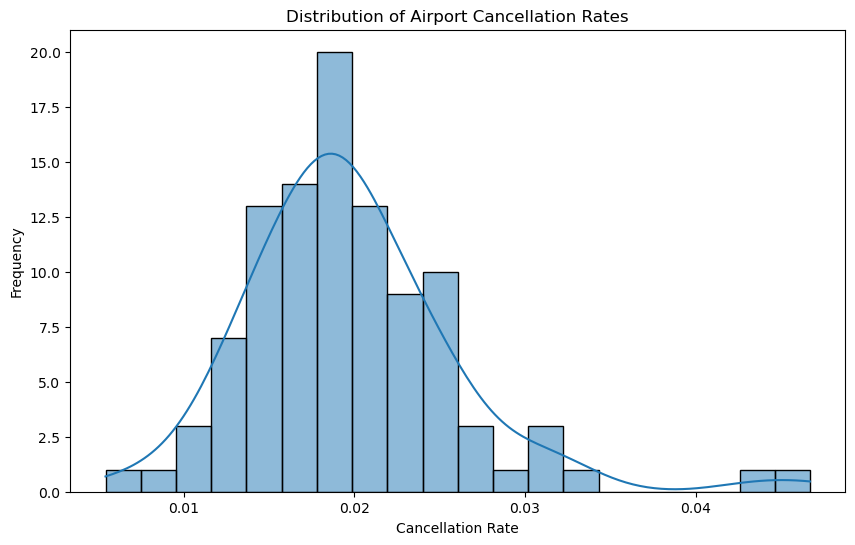

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(airport_cancelled_rate, kde=True, bins=20)
plt.title("Distribution of Airport Cancellation Rates")
plt.xlabel("Cancellation Rate")
plt.ylabel("Frequency")
plt.show()


### Airline cancellation rates - exclude 22-23 Holiday Season

In [26]:
#use YearMonth during airline analysis to exclude 2022-23 holiday season
flights_data['YearMonth'] = [x[0:7] for x in flights_data['FlightDate']]
flights_not_22 = flights_data[~flights_data['YearMonth'].isin(['2022-11','2022-12','2023-01'])]
#we only have 10 airlines, calculate cancelled rate for each airline
airline_counts_ex22 = flights_not_22['Marketing_Airline_Network'].value_counts()
print(airline_counts_ex22)
flights_not_22['Cancelled'] = pd.to_numeric(flights_not_22['Cancelled'], errors='coerce')

airline_cancelled_rate_ex22 = flights_not_22.groupby('Marketing_Airline_Network')['Cancelled'].mean()

print(airline_cancelled_rate_ex22)
print(f"overall cancelled rate: {flights_not_22['Cancelled'].mean()}")

AA    1396420
WN    1249593
DL    1162508
UA    1034482
AS     307006
B6     242611
NK     187993
F9     126477
HA      66999
G4      41229
Name: Marketing_Airline_Network, dtype: int64


C:\Users\armer\AppData\Local\Temp\ipykernel_20880\835237960.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_not_22['Cancelled'] = pd.to_numeric(flights_not_22['Cancelled'], errors='coerce')


Marketing_Airline_Network
AA    0.016320
AS    0.024563
B6    0.018441
DL    0.009620
F9    0.012081
G4    0.020350
HA    0.008493
NK    0.012506
UA    0.022941
WN    0.017599
Name: Cancelled, dtype: float64
overall cancelled rate: 0.01667974133142848


### Airline cancellation rates - include 22-23 Holiday Season

In [20]:
#we only have 10 airlines, calculate cancelled rate for each airline
airline_counts = flights_data['Marketing_Airline_Network'].value_counts()
print(airline_counts.sort_index())
flights_data['Cancelled'] = pd.to_numeric(flights_data['Cancelled'], errors='coerce')

airline_cancelled_rate = flights_data.groupby('Marketing_Airline_Network')['Cancelled'].mean()

print(airline_cancelled_rate.sort_index())
print(f"overall cancelled rate: {flights_data['Cancelled'].mean()}")

AA    1706880
AS     378013
B6     307713
DL    1453813
F9     163517
G4      52564
HA      84082
NK     247359
UA    1268992
WN    1582613
Name: Marketing_Airline_Network, dtype: int64
Marketing_Airline_Network
AA    0.016127
AS    0.026211
B6    0.017848
DL    0.010795
F9    0.017111
G4    0.021479
HA    0.010668
NK    0.016446
UA    0.021317
WN    0.027046
Name: Cancelled, dtype: float64
overall cancelled rate: 0.018958957682416205


### Airline cancellation rates - visualization

  Airline  Flights  Cancelled_Rate
0      AA  1706880        0.016127
9      WN  1582613        0.027046
3      DL  1453813        0.010795
8      UA  1268992        0.021317
1      AS   378013        0.026211


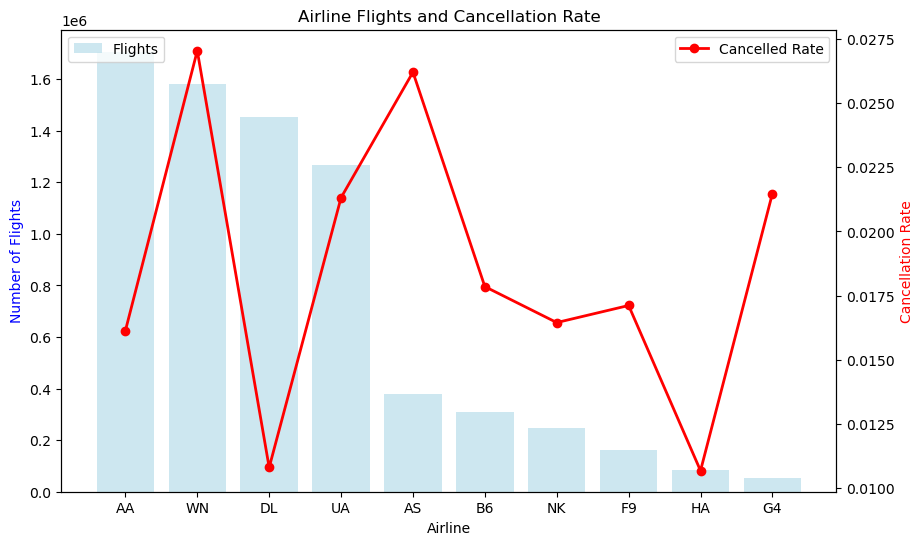

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
#data - including 22-23 holiday seasson
data = {
    'Airline' : ['AA','AS','B6','DL','F9','G4','HA','NK','UA','WN'],
    'Flights' : list(airline_counts.sort_index()),
    'Cancelled_Rate': list(airline_cancelled_rate.sort_index())
}

data1 = pd.DataFrame(data).sort_values(by=['Flights'],ascending=False)
#print(data1.head())
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.bar(data1['Airline'], data1['Flights'], color='lightblue', alpha=0.6, label='Flights')
ax2.plot(data1['Airline'], data1['Cancelled_Rate'], color='red', marker='o', label='Cancelled Rate', linestyle='-', linewidth=2)

ax1.set_xlabel('Airline')
ax1.set_ylabel('Number of Flights', color='blue')
ax2.set_ylabel('Cancellation Rate', color='red')
plt.title('Airline Flights and Cancellation Rate')# - Excluding 2022-23 Season')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

  Airline  Flights  Cancelled_Rate
0      AA  1396420        0.016320
9      WN  1249593        0.017599
3      DL  1162508        0.009620
8      UA  1034482        0.022941
1      AS   307006        0.024563


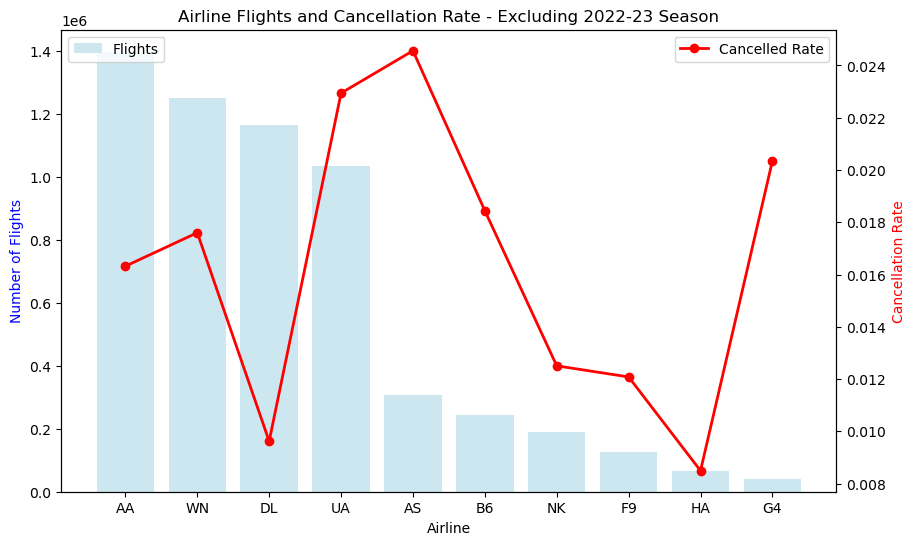

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
#data - excluding 22-23 holiday seasson
data = {
    'Airline' : ['AA','AS','B6','DL','F9','G4','HA','NK','UA','WN'],
    'Flights' : list(airline_counts_ex22.sort_index()),
    'Cancelled_Rate': list(airline_cancelled_rate_ex22.sort_index())
}

data1 = pd.DataFrame(data).sort_values(by=['Flights'],ascending=False)
#print(data1.head())
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.bar(data1['Airline'], data1['Flights'], color='lightblue', alpha=0.6, label='Flights')
ax2.plot(data1['Airline'], data1['Cancelled_Rate'], color='red', marker='o', label='Cancelled Rate', linestyle='-', linewidth=2)

ax1.set_xlabel('Airline')
ax1.set_ylabel('Number of Flights', color='blue')
ax2.set_ylabel('Cancellation Rate', color='red')
plt.title('Airline Flights and Cancellation Rate - Excluding 2022-23 Season')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [ ]:
#ANOVA: significant cancelled rate different between airlines
from scipy.stats import f_oneway
groups = [flights_data['Cancelled'][flights_data['Marketing_Airline_Network'] == airline] for airline in flights_data['Marketing_Airline_Network'].unique()]
# （ANOVA）
f_stat, p_value = f_oneway(*groups)
print(f"P-value from ANOVA: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in cancellation rates among airlines.")
else:
    print("There is no significant difference in cancellation rates among airlines.")


### Set 3 cancel rate level , we tried to use it in the model

In [ ]:
import pandas as pd
cancel_rate = {
    'AA': 0.016106,
    'AS': 0.026226,
    'B6': 0.017821,
    'DL': 0.010810,
    'F9': 0.017101,
    'G4': 0.020947,
    'HA': 0.010668,
    'NK': 0.016425,
    'UA': 0.021238,
    'WN': 0.026851
}
cancel_rate_df = pd.DataFrame(list(cancel_rate.items()), columns=['Airline', 'CancelRate'])
def assign_cancel_level(rate):
    if rate <= 0.015:
        return 0.1 #
    elif rate <= 0.02:
        return 0.2 
    else:
        return 0.3 
cancel_rate_df['CancelLevel'] = cancel_rate_df['CancelRate'].apply(assign_cancel_level)
print(cancel_rate_df)


In [ ]:
flights_data = flights_data.merge(cancel_rate_df[['Airline', 'CancelLevel']], 
                                  left_on='Marketing_Airline_Network', 
                                  right_on='Airline', 
                                  how='left')
flights_data = flights_data.drop('Airline', axis=1)
print(flights_data.head())


### Convert datatype & Imputation

In [ ]:
#construct 'Hour' and 'Month'
flights_data['FlightDate'] = pd.to_datetime(flights_data['FlightDate'])  
flights_data['Month'] = flights_data['FlightDate'].dt.month  
flights_data['Hour'] = flights_data['CRSDepTime'].astype(str).str.zfill(4).str[:2].astype(int) 

In [ ]:
# Fill NaN values in HourlyWindSpeed_ORIGIN column with 0
flights_data['HourlyWindSpeed_DEST'] = pd.to_numeric(flights_data['HourlyWindSpeed_DEST'], errors='coerce')
flights_data['HourlyWindSpeed_DEST'].fillna(0, inplace=True)
flights_data['HourlyWindSpeed_ORIGIN'] = pd.to_numeric(flights_data['HourlyWindSpeed_DEST'], errors='coerce')
flights_data['HourlyWindSpeed_ORIGIN'].fillna(0, inplace=True)

In [ ]:
#Fill NaN or 'T' in precipitation with 0
flights_data['HourlyPrecipitation_DEST'] = pd.to_numeric(flights_data['HourlyPrecipitation_DEST'], errors='coerce')
flights_data['HourlyPrecipitation_DEST'].fillna(0, inplace=True)
flights_data['HourlyPrecipitation_ORIGIN'] = pd.to_numeric(flights_data['HourlyPrecipitation_ORIGIN'], errors='coerce')
flights_data['HourlyPrecipitation_ORIGIN'].fillna(0, inplace=True)

In [ ]:
#Convert Visibility to float type, delete all NaN datapoints(634/46081 total 134863/7154946)
flights_data['HourlyVisibility_ORIGIN'] = pd.to_numeric(flights_data['HourlyVisibility_ORIGIN'], errors='coerce')
flights_data['Cancelled'] = pd.to_numeric(flights_data['Cancelled'], errors='coerce')
print(flights_data['HourlyVisibility_ORIGIN'].isna().sum(), "NaN values found after conversion.")
print(flights_data[['HourlyVisibility_ORIGIN','Cancelled']][flights_data['HourlyVisibility_ORIGIN'].isna()])
sub=flights_data['Cancelled'][flights_data['HourlyVisibility_ORIGIN'].isna()]
flights_data = flights_data.dropna(subset=['HourlyVisibility_ORIGIN'])

In [ ]:
#Convert Visibility to float type, delete all NaN datapoints(634/46081 total 134863/7154946)
flights_data['HourlyVisibility_DEST'] = pd.to_numeric(flights_data['HourlyVisibility_DEST'], errors='coerce')

print(flights_data['HourlyVisibility_DEST'].isna().sum(), "NaN values found after conversion.")
print(flights_data[['HourlyVisibility_DEST','Cancelled']][flights_data['HourlyVisibility_DEST'].isna()])
sub=flights_data['Cancelled'][flights_data['HourlyVisibility_DEST'].isna()]
flights_data = flights_data.dropna(subset=['HourlyVisibility_DEST'])

In [ ]:
flights_data['DailySnowDepth_DEST'] = pd.to_numeric(flights_data['DailySnowDepth_DEST'], errors='coerce').fillna(0)
flights_data['DailySnowfall_DEST'] = pd.to_numeric(flights_data['DailySnowfall_DEST'], errors='coerce').fillna(0)
print("DailySnowDepth_DEST distribution:")
print(flights_data['DailySnowDepth_DEST'].describe())
print("\nDailySnowfall_DEST distribution:")
print(flights_data['DailySnowfall_DEST'].describe())

print("\nDailySnowDepth_DEST value counts:")
print(flights_data['DailySnowDepth_DEST'].value_counts().head(10)) 

print("\nDailySnowfall_DEST value counts:")
print(flights_data['DailySnowfall_DEST'].value_counts().head(10))  


In [ ]:
flights_data['DailySnowDepth_ORIGIN'] = pd.to_numeric(flights_data['DailySnowDepth_ORIGIN'], errors='coerce').fillna(0)
flights_data['DailySnowfall_ORIGIN'] = pd.to_numeric(flights_data['DailySnowfall_ORIGIN'], errors='coerce').fillna(0)
print("DailySnowDepth_DEST distribution:")
print(flights_data['DailySnowDepth_ORIGIN'].describe())
print("\nDailySnowfall_DEST distribution:")
print(flights_data['DailySnowfall_ORIGIN'].describe())
print("\nDailySnowDepth_DEST value counts:")
print(flights_data['DailySnowDepth_ORIGIN'].value_counts().head(10)) 
print("\nDailySnowfall_DEST value counts:")
print(flights_data['DailySnowfall_ORIGIN'].value_counts().head(10)) 

In [ ]:
# try one-hot encoding for airlines
#airline_dummies = pd.get_dummies(flights_data['Marketing_Airline_Network'], prefix='Airline')
#flights_data = pd.concat([flights_data, airline_dummies], axis=1)
#flights_data = flights_data.drop('Marketing_Airline_Network', axis=1)


#  2.Model

In [ ]:
#pip install imbalanced-learn #run if not already installed


In [ ]:
#conda install -c conda-forge imbalanced-learn #run if not already installed


## 2.1 Cancellation model

### Logistic Regression

We've tried different predictors and thresholds. To make it concise, we only show our final model here.
The final model is using 'Month','Visibility at origin','WindSpeed at destination','SnowDepth at origin','SnowDepth at destination' as predictors. Visibility and WindSpeed are set to 3 catagories and SnowDepth is set to 2 catagories. 

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, f1_score, roc_auc_score, precision_score

#target_airlines = ['AA', 'WN', 'DL', 'UA']
flights_data_filtered = flights_data#[flights_data['Marketing_Airline_Network'].isin(target_airlines)]

cancelled = flights_data_filtered[flights_data_filtered['Cancelled'] == 1]
cancelled = cancelled[cancelled['CancellationCode']=='B']
not_cancelled = flights_data_filtered[flights_data_filtered['Cancelled'] == 0].sample(len(cancelled), random_state=42)
flights_data_balanced = pd.concat([cancelled, not_cancelled])

X_base = flights_data_balanced[['Month']]
y = flights_data_balanced['Cancelled']
best_threshold = None
best_recall = -10

def categorize_visibility(vis):
    if vis > 16:
        return 0
    elif vis > 6:
        return 1
    else:
        return 2

def categorize_wind_speed(wind):
    if wind < 4:#this threshold is decided after testing different thresholds
        return 0
    elif wind < 10:
        return 1
    else:
        return 2
def categorize_snow_fall(snow):
    if snow <=0:
        return 0 
    else:
        return 1

flights_data_balanced['Vis_ORIGIN_category'] = flights_data_balanced['HourlyVisibility_ORIGIN'].apply(categorize_visibility)
flights_data_balanced['Wind_DEST_category'] = flights_data_balanced['HourlyWindSpeed_DEST'].apply(categorize_wind_speed)
flights_data_balanced['Snow_DEST_category'] = flights_data_balanced['DailySnowfall_DEST'].apply(categorize_snow_fall)
flights_data_balanced['Snow_ORIGIN_category'] = flights_data_balanced['DailySnowfall_ORIGIN'].apply(categorize_snow_fall)
X = X_base.copy()
X['Vis_ORIGIN_category'] = flights_data_balanced['Vis_ORIGIN_category']
X['Wind_DEST_category'] = flights_data_balanced['Wind_DEST_category']
X['Snow_ORIGIN_category'] = flights_data_balanced['Snow_ORIGIN_category']
X['Snow_DEST_category'] = flights_data_balanced['Snow_DEST_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]
custom_threshold = 0.46# we also adjust the threshold of Logistic regression to get the best recall &accuracy
y_pred_custom = (y_prob >= custom_threshold).astype(int)

recall = recall_score(y_test, y_pred_custom)
accuracy = accuracy_score(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"recall: {recall}, accuracy: {accuracy}, precision: {precision}, f1_score: {f1}, roc_auc: {roc_auc}")

In [ ]:
#review order of X cols to check model_predict.py functions
X_train.head()

##### Save Cancellation Model to pickle file

In [ ]:
#save model to .pkl so it can be used to predict values in Shiny app
import pickle
with open('cancel_model.pkl','wb') as f:
    pickle.dump(model,f)

### 
### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree_model.fit(X_train, y_train)

y_tree_pred = tree_model.predict(X_test)
tree_recall = recall_score(y_test, y_tree_pred, average='macro')
tree_accuracy = accuracy_score(y_test, y_tree_pred)
tree_precision = precision_score(y_test, y_tree_pred, average='macro')
tree_f1 = f1_score(y_test, y_tree_pred, average='macro')

print(f"Decision Tree - Recall: {tree_recall}, Accuracy: {tree_accuracy}, Precision: {tree_precision}, F1 Score: {tree_f1}")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cancelled_flights = flights_data[flights_data['Cancelled'] == 1]


plt.figure(figsize=(10, 6))
sns.histplot(cancelled_flights['HourlyVisibility_ORIGIN'], bins=30, kde=True)
plt.title('Visibility Distribution for Cancelled Flights')
plt.xlabel('Hourly Visibility at Origin (miles)')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancelled', y='HourlyVisibility_ORIGIN', data=flights_data)
plt.title('Visibility Comparison for Cancelled and Non-cancelled Flights')
plt.xlabel('Cancelled (1 = Yes, 0 = No)')
plt.ylabel('Hourly Visibility at Origin (miles)')
plt.show()

## 2.2 Delay model

prepare the delay dataset

In [44]:
#exclude canceled flights
flights_delay= flights_data.dropna(subset=['ArrDelay'])

In [45]:
flights_delay['ArrDelay'] = pd.to_numeric(flights_delay['ArrDelay'], errors='coerce')

C:\Users\armer\AppData\Local\Temp\ipykernel_20880\4115167088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_delay['ArrDelay'] = pd.to_numeric(flights_delay['ArrDelay'], errors='coerce')


In [ ]:

#flights_delay['CarrierDelay'] = pd.to_numeric(flights_delay['CarrierDelay'], errors='coerce')
#flights_delay['WeatherDelay'] = pd.to_numeric(flights_delay['CarrierDelay'], errors='coerce')
#flights_delay['NASDelay'] = pd.to_numeric(flights_delay['CarrierDelay'], errors='coerce')
f#lights_delay['SecurityDelay'] = pd.to_numeric(flights_delay['CarrierDelay'], errors='coerce')

In [ ]:
#flights_delay['WeatherDelay'].fillna(0, inplace=True)

In [46]:
flights_delay['AirTime'] = pd.to_numeric(flights_delay['AirTime'], errors='coerce')
flights_delay['Distance'] = pd.to_numeric(flights_delay['Distance'], errors='coerce')

C:\Users\armer\AppData\Local\Temp\ipykernel_20880\273410568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_delay['AirTime'] = pd.to_numeric(flights_delay['AirTime'], errors='coerce')
C:\Users\armer\AppData\Local\Temp\ipykernel_20880\273410568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_delay['Distance'] = pd.to_numeric(flights_delay['Distance'], errors='coerce')


In [47]:
def convert_delay_to_category(delay):
    if delay <= 0:
        return 0
    elif delay < 60:
        return 1
    else:  # delay >= 60
        return 2
flights_delay['delay_category'] = flights_delay['ArrDelay'].apply(convert_delay_to_category)

C:\Users\armer\AppData\Local\Temp\ipykernel_20880\1811638034.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_delay['delay_category'] = flights_delay['ArrDelay'].apply(convert_delay_to_category)


### Flight Delays by Airline - visualization

In [48]:
#we only have 10 airlines, calculate cancelled rate for each airline
airline_counts_del = flights_delay['Marketing_Airline_Network'].value_counts()
print(airline_counts_del)

airline_delay_rate = flights_delay.groupby('Marketing_Airline_Network')['ArrDelay'].mean()
print(airline_delay_rate)

AA    1676271
WN    1537669
DL    1435810
UA    1239566
AS     366862
B6     301311
NK     243032
F9     160546
HA      83073
G4      51308
Name: Marketing_Airline_Network, dtype: int64
Marketing_Airline_Network
AA     4.598431
AS     3.759217
B6    11.676633
DL     0.658917
F9    10.207585
G4    12.554416
HA     5.130307
NK     6.568197
UA     5.310609
WN     2.762572
Name: ArrDelay, dtype: float64


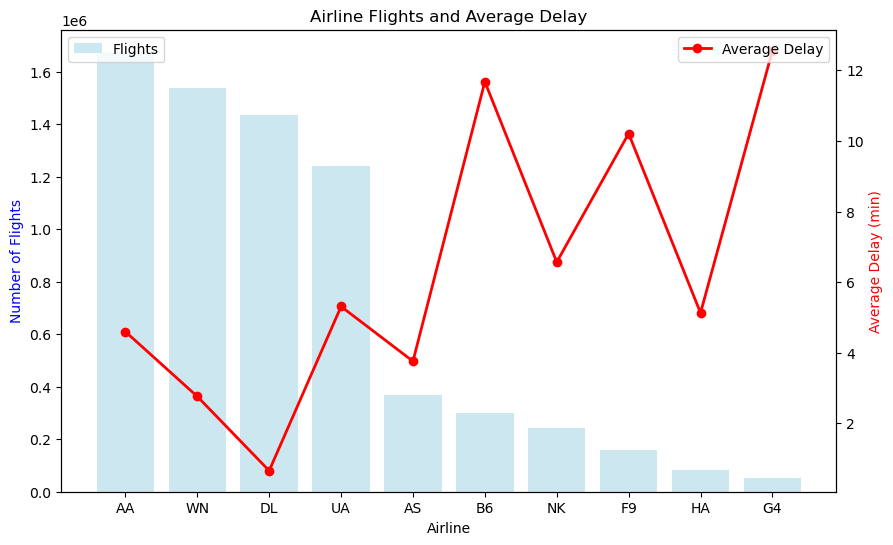

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
#data - including 22-23 holiday seasson
data = {
    'Airline' : ['AA','AS','B6','DL','F9','G4','HA','NK','UA','WN'],
    'Flights' : list(airline_counts_del.sort_index()),
    'Average Delay (min)': list(airline_delay_rate.sort_index())
}

data1 = pd.DataFrame(data).sort_values(by=['Flights'],ascending=False)
#print(data1.head())
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.bar(data1['Airline'], data1['Flights'], color='lightblue', alpha=0.6, label='Flights')
ax2.plot(data1['Airline'], data1['Average Delay (min)'], color='red', marker='o', label='Average Delay', linestyle='-', linewidth=2)

ax1.set_xlabel('Airline')
ax1.set_ylabel('Number of Flights', color='blue')
ax2.set_ylabel('Average Delay (min)', color='red')
plt.title('Airline Flights and Average Delay')# - Excluding 2022-23 Season')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

### prob of flight delays

Only 35% flights arrive later than expected

In [ ]:
len(flights_delay['ArrDelay'][flights_delay['ArrDelay']>0])/len(flights_delay['ArrDelay'])

Only 18% arrive > 15 min late

In [ ]:
len(flights_delay['ArrDelay'][flights_delay['ArrDelay']>15])/len(flights_delay['ArrDelay'])

Only 6% arrive >60 min late

In [ ]:
len(flights_delay['ArrDelay'][flights_delay['ArrDelay']>60])/len(flights_delay['ArrDelay'])

In [ ]:
len(flights_delay['ArrDelay'][flights_delay['ArrDelay']>=300])/len(flights_delay['ArrDelay'])

but there are some delayed > 15h +

In [ ]:
print(flights_delay[flights_delay['ArrDelay']>=1000])

In [ ]:
sum(flights_delay['ArrDelay'])/len(flights_delay['ArrDelay'])

On average, flights delayed for 4 min

In [ ]:
arr_delay_data = flights_data['ArrDelay'].dropna()  

plt.figure(figsize=(10, 6))
sns.histplot(arr_delay_data, bins=100, kde=True)  
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Delay (ArrDelay)')
plt.xlim(-50, 300)  
plt.show()

## Model selection

###    Logistic Regression

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score
#target_airlines = ['AA', 'WN', 'DL', 'UA']
flights_data_filtered = flights_delay#[flights_delay['Marketing_Airline_Network'].isin(target_airlines)]

delay2 = flights_data_filtered[flights_data_filtered['delay_category'] == 2]
delay1 = flights_data_filtered[flights_data_filtered['delay_category'] == 1].sample(len(delay2), random_state=42)
delay0 = flights_data_filtered[flights_data_filtered['delay_category'] == 0].sample(len(delay2), random_state=42)
flights_data_balanced = pd.concat([delay0, delay1, delay2])

X_base = flights_data_balanced[['Month','Hour']]#,'DaysUntilHol']]
y = flights_data_balanced['delay_category']  

def categorize_visibility(vis):
    if vis > 16:
        return 0
    elif vis > 6:
        return 1
    else:
        return 2

def categorize_wind_speed(wind):
    if wind < 4:
        return 0
    elif wind < 10:
        return 1
    else:
        return 2
def categorize_snow_fall(snow):
    if snow <= 3:
        return 0 
    else:
        return 1

flights_data_balanced['Vis_ORIGIN_category'] = flights_data_balanced['HourlyVisibility_ORIGIN'].apply(categorize_visibility)
flights_data_balanced['Wind_DEST_category'] = flights_data_balanced['HourlyWindSpeed_DEST'].apply(categorize_wind_speed)
flights_data_balanced['Snow_DEST_category'] = flights_data_balanced['DailySnowfall_DEST'].apply(categorize_snow_fall)
#flights_data_balanced['Pre_ORIGIN_category'] = flights_data_balanced['HourlyPrecipitation_ORIGIN'].apply(categorize_snow_fall)
flights_data_balanced['Snow_ORIGIN_category'] = flights_data_balanced['DailySnowfall_ORIGIN'].apply(categorize_snow_fall)
X = X_base.copy()
X['Vis_ORIGIN_category'] = flights_data_balanced['Vis_ORIGIN_category']
#X['Pre_ORIGIN_category'] = flights_data_balanced['Pre_ORIGIN_category']
X['Wind_DEST_category'] = flights_data_balanced['Wind_DEST_category']
X['Snow_ORIGIN_category'] = flights_data_balanced['Snow_ORIGIN_category']
X['Snow_DEST_category'] = flights_data_balanced['Snow_DEST_category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

recall = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Recall: {recall}, Accuracy: {accuracy}, Precision: {precision}, F1 Score: {f1}")

In [ ]:
#review order of X_train cols to check model_predict.py
X_train.head()

##### save delay model to pickle file

In [ ]:
#save final selected delay model to .pkl to be used by the Shiny app for prediction

In [ ]:
#save model to .pkl so it can be used to predict values in Shiny app
with open('delay_model.pkl','wb') as f:
    pickle.dump(model,f)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree_model.fit(X_train, y_train)
y_tree_pred = tree_model.predict(X_test)
tree_recall = recall_score(y_test, y_tree_pred, average='macro')
tree_accuracy = accuracy_score(y_test, y_tree_pred)
tree_precision = precision_score(y_test, y_tree_pred, average='macro')
tree_f1 = f1_score(y_test, y_tree_pred, average='macro')

print(f"Decision Tree - Recall: {tree_recall}, Accuracy: {tree_accuracy}, Precision: {tree_precision}, F1 Score: {tree_f1}")


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

rf_recall = recall_score(y_test, y_rf_pred, average='macro')
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_precision = precision_score(y_test, y_rf_pred, average='macro')
rf_f1 = f1_score(y_test, y_rf_pred, average='macro')

print(f"Random Forest - Recall: {rf_recall}, Accuracy: {rf_accuracy}, Precision: {rf_precision}, F1 Score: {rf_f1}")


### Gradient Boosting Machine

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train, y_train)
y_gbc_pred = gbc_model.predict(X_test)

gbc_recall = recall_score(y_test, y_gbc_pred, average='macro')
gbc_accuracy = accuracy_score(y_test, y_gbc_pred)
gbc_precision = precision_score(y_test, y_gbc_pred, average='macro')
gbc_f1 = f1_score(y_test, y_gbc_pred, average='macro')

print(f"Gradient Boosting - Recall: {gbc_recall}, Accuracy: {gbc_accuracy}, Precision: {gbc_precision}, F1 Score: {gbc_f1}")


svm takes really long time to compute

In [ ]:
#from sklearn.svm import SVC
#svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True)
#svm_model.fit(X_train, y_train)
#y_svm_pred = svm_model.predict(X_test)
#svm_recall = recall_score(y_test, y_svm_pred, average='macro')
#svm_accuracy = accuracy_score(y_test, y_svm_pred)
#svm_precision = precision_score(y_test, y_svm_pred, average='macro')
#svm_f1 = f1_score(y_test, y_svm_pred, average='macro')
#print(f"SVM - Recall: {svm_recall}, Accuracy: {svm_accuracy}, Precision: {svm_precision}, F1 Score: {svm_f1}")
